<a href="https://colab.research.google.com/github/Tsyhankova/goit_python/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

# Создать спарк сессию.

In [ ]:
import pandas as pd
import pyspark

from pyspark.sql import Row
from pyspark.sql import SparkSession


spark = SparkSession.builder.getOrCreate()

# Прочитать датасет в датафрейм.

In [ ]:
df = spark.read.format("csv").load("bestsellers with categories.csv", header=True)

In [ ]:
print(df.show())

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

# Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7

In [ ]:
from pyspark.sql.functions import col
user_rating = df.select(col("User Rating").alias("User_rating"))

In [ ]:
from pyspark.sql.functions import mean, stddev, round as _round

In [ ]:
user_rating = user_rating.filter("User_rating >= 4.7")

In [ ]:
user_rating.select(
    mean("User_rating").alias("average rating")).show()

+-----------------+
|   average rating|
+-----------------+
|4.780487804878049|
+-----------------+



# Построить гистограмму распределения рецензий (столбец Reviews).

In [ ]:
reviews = df.select("Reviews")

In [ ]:
reviews.show(5)

+-------+
|Reviews|
+-------+
|  17350|
|   2052|
|  18979|
|  21424|
|   7665|
+-------+
only showing top 5 rows



array([[<AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

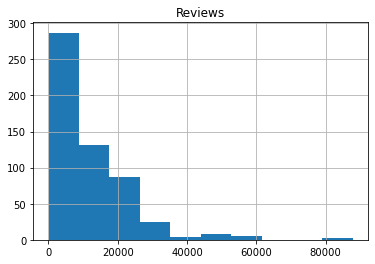

In [ ]:
(reviews.toPandas()[["Reviews"]]).astype('float64').hist(column = "Reviews" )

# Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".

In [ ]:
df_num = df.select(df["User Rating"].cast("float"), df.Reviews.cast("float"), df.Price.cast("float"))

In [ ]:
df_num.toPandas().corr().abs()

,User Rating,Reviews,Price
User Rating,1.000000,0.001729,0.133086
Reviews,0.001729,1.000000,0.109182
Price,0.133086,0.109182,1.000000


# Используя библиотеку seaborn построить парные графики (pairplots) столбцов "User Rating", "Reviews" и "Price".

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_ = df_num.toPandas()

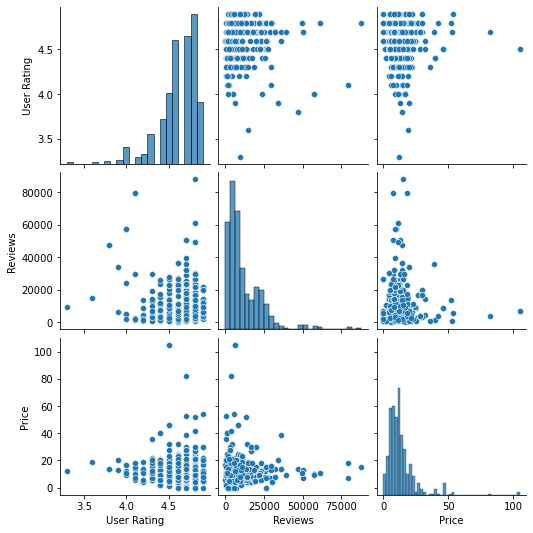

In [ ]:
sns.pairplot(df_)

# Задание 2

При выполнении этого задания разрешается использовать только Spark SQL. Для датасета из предыдущего задания выполните следующее:

Найдите автора с самым высоким рейтингом. 
<b>Eсть не один автор с самым высоким рейтингом 4.9, вывожу в табл сразу 12 </b>

In [ ]:
df.createOrReplaceTempView("df")

In [ ]:
spark.sql(
    """
      Select 
        Author, avg(`User Rating`) as `Average Rating`
      From df
      Group By Author
      Order by `Average Rating` desc
      Limit 12
    """
).show()

+--------------------+------------------+
|              Author|    Average Rating|
+--------------------+------------------+
|      Nathan W. Pyle|               4.9|
|          Jill Twiss|               4.9|
|       Rush Limbaugh|               4.9|
|         Chip Gaines|               4.9|
|  Lin-Manuel Miranda|               4.9|
|      Alice Schertle|               4.9|
|     Bill Martin Jr.|               4.9|
|      Patrick Thorpe|               4.9|
|Emily Winfield Ma...|               4.9|
|          Pete Souza|               4.9|
|Sherri Duskey Rinker|               4.9|
|          Dav Pilkey|4.8999999999999995|
+--------------------+------------------+



Найдите трех авторов с самым низким рейтингом.

In [ ]:
spark.sql(
    """
      Select 
        Author, avg(`User Rating`) as `Average Rating`
      From df
      Group By Author
      Order by `Average Rating`
      Limit 1
    """
).show()

+-----------+--------------+
|     Author|Average Rating|
+-----------+--------------+
|Donna Tartt|           3.9|
+-----------+--------------+



Определите какой автор получил наибольшее количество рецензий.

In [ ]:
df_rev = df.select(df["Reviews"].cast("float"), df["Author"])
df_rev.createOrReplaceTempView("df_rev")

spark.sql(
    """
      Select Author, Reviews
      From df_rev
      Order by Reviews desc
      Limit 1
    """
).show()

+-----------+-------+
|     Author|Reviews|
+-----------+-------+
|Delia Owens|87841.0|
+-----------+-------+



Определите какой автор написал наибольшее количество книг за весь доступный в данных период.

In [ ]:
spark.sql(
    """
      Select 
        Author, COUNT(*) AS `number of books`
      From df
      Group By Author
      Order by `number of books` desc
      Limit 1
    """
).show()

+-----------+---------------+
|     Author|number of books|
+-----------+---------------+
|Jeff Kinney|             12|
+-----------+---------------+



Определите какая книга жанра "Fiction" имеет самый маленький рейтинг.

In [ ]:
spark.sql(
    """
      Select 
        Name, `User Rating`, Genre, Author
      From df
      Where Genre = 'Fiction'
      Order by `User Rating`
      Limit 1
    """
).show()

+------------------+-----------+-------+------------+
|              Name|User Rating|  Genre|      Author|
+------------------+-----------+-------+------------+
|The Casual Vacancy|        3.3|Fiction|J.K. Rowling|
+------------------+-----------+-------+------------+



Определите какая книга жанра "Non Fiction" имеет самый высокий рейтинг. <b>Такая книга не одна, поэтому вывела 10 </b>

In [ ]:
spark.sql(
    """
      Select 
        Name, `User Rating`, Genre
      From df
      Where Genre = 'Non Fiction'
      Order by `User Rating` desc
      Limit 10
    """
).show()

+--------------------+-----------+-----------+
|                Name|User Rating|      Genre|
+--------------------+-----------+-----------+
|Humans of New Yor...|        4.9|Non Fiction|
|Unfreedom of the ...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|  The Magnolia Story|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Obama: An Intimat...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
|Jesus Calling: En...|        4.9|Non Fiction|
+--------------------+-----------+-----------+



# Задание 3

Постройте гистограмму среднего количества рецензий по годам. В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период.

<AxesSubplot:xlabel='Year'>

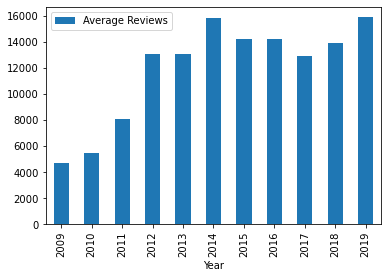

In [ ]:
Avg_rev_by_y = spark.sql(
    """
      Select
        Year as `Year`, avg(`Reviews`) as `Average Reviews`
      From df
      Group by `Year`
      Order by `Year`
    """
)

Avg_rev_by_year = Avg_rev_by_y.select(Avg_rev_by_y["Average Reviews"].cast("float"), Avg_rev_by_y["Year"])

Avg_rev_by_year.toPandas().plot(x="Year", y="Average Reviews", kind="bar")

In [ ]:
genre = spark.sql(
    """
      Select
        Genre, COUNT(*) AS `number of books`
      From df
      Group by Genre
    """
)

genre.show()

+-----------+---------------+
|      Genre|number of books|
+-----------+---------------+
|    Fiction|            240|
|Non Fiction|            310|
+-----------+---------------+



<AxesSubplot:title={'center':'Genre'}, ylabel='number of books'>

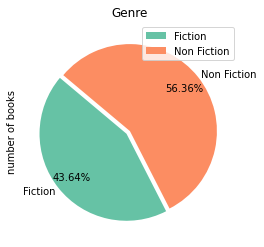

In [ ]:
genre.toPandas().plot(x="Genre", y = "number of books", kind = "pie",
                     title ='Genre', 
                     labels = ['Fiction', 'Non Fiction'], 
                     explode = [0.05, 0],
                     autopct="%.2f%%",
                     startangle=140,
                     pctdistance=0.8,
                     labeldistance=1.05,
                     colors=plt.cm.Set2.colors
)

<AxesSubplot:xlabel='Genre'>

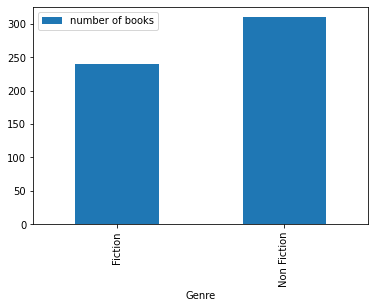

In [ ]:
genre.toPandas().plot(x="Genre", y = "number of books", kind="bar")